<a href="https://colab.research.google.com/github/SDatla8/Car-Racing-Game/blob/master/c117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving heart.csv to heart (1).csv


In [3]:
import pandas as pd
df=pd.read_csv("heart.csv")
print(df.head(20))

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   1       13

In [4]:
from sklearn.model_selection import train_test_split
age=df["age"]
heart_attack=df["target"]
age_train,age_test,heart_attack_train,heart_attack_test=train_test_split(age,heart_attack,test_size=0.25,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X=np.reshape(age_train.ravel(),(len (age_train),1))
Y=np.reshape(heart_attack_train.ravel(),(len (heart_attack_train),1))
classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [8]:
X_test=np.reshape(age_train.ravel(),(len (age_train),1))
Y_test=np.reshape(heart_attack_train.ravel(),(len (heart_attack_train),1))
heart_attack_prediction=classifier.predict(X_test)
predicted_values=[]
for i in heart_attack_prediction:
  if i==0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values=[]
for i in Y_test.ravel():
  if i==0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")    
    


[Text(0, 0.5, 'l'), Text(0, 1.5, 'a')]

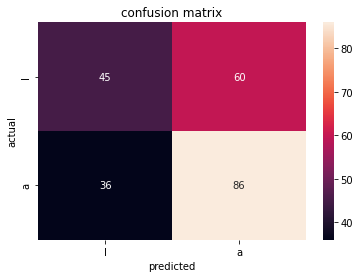

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels=["Yes","No"]
cm=confusion_matrix(actual_values,predicted_values)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("confusion matrix")
ax.xaxis.set_ticklabels("labels")
ax.yaxis.set_ticklabels("labels")

In [11]:
accuracy= 45+86/45+60+96+36
accuracy=131/237
print(accuracy)

0.5527426160337553
